In [1]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

In [3]:
feature = iris['data']
target = iris['target']
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
x_train.shape

(120, 4)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train,y_train)

In [11]:
y_pred = knn.predict(x_test)

In [12]:
print(y_test)
print(y_pred)

[2 0 1 1 1 2 2 1 0 0 2 2 0 2 2 0 1 1 2 0 0 2 1 0 2 1 1 1 0 0]
[2 0 1 1 1 1 2 1 0 0 2 1 0 2 2 0 1 1 2 0 0 2 2 0 2 1 1 1 0 0]


In [13]:
knn.score(x_test,y_test)

0.9

In [14]:
knn.predict([[6.1,3.1,4.7,2.1]])

array([2])

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [22]:
adult = pd.read_csv('adult.data',header=None)

In [23]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
adult.columns 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [36]:
feature = adult[[0,4,6,12]]
target = adult[14]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.1,random_state=20)
occ_one_hot = pd.get_dummies(x_train[6])
x_train = pd.concat([x_train,occ_one_hot],axis=1).drop(6,axis=1)
occ_one_hot_text = pd.get_dummies(x_test[6])
x_test = pd.concat([x_test,occ_one_hot_text],axis=1).drop(6,axis=1)

In [40]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.763586122198342

In [45]:
df = pd.read_csv('datingTestSet.txt',header=None,sep='\s+')
df

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [46]:
feature = df[[0,1,2]]
target = df[3]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
x_train

,0,1,2
983,9493,6.724021,0.563044
337,15941,0.000000,0.061191
434,81046,15.833048,1.568245
193,52914,3.976796,1.043109
437,39299,6.325139,0.605109
...,...,...,...
707,29241,7.791833,1.111416
630,7052,2.633627,1.097866
323,67705,6.038620,1.509646
392,56557,11.746200,1.695517


In [48]:
x_train.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [52]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
m_x_train = mm.fit_transform(x_train)
m_x_train

array([[0.10400666, 0.32142592, 0.33162236],
       [0.17465187, 0.        , 0.03543224],
       [0.88795153, 0.75686141, 0.92488496],
       ...,
       [0.74178563, 0.28866195, 0.89030024],
       [0.61964655, 0.56149931, 1.        ],
       [0.13440996, 0.26364057, 0.14719768]])

In [53]:
m_x_test = mm.transform(x_test)

In [54]:
scores = []
ks = []
for i in range(3,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(m_x_train,y_train)
    scores.append(knn.score(m_x_test,y_test))
    ks.append(i)


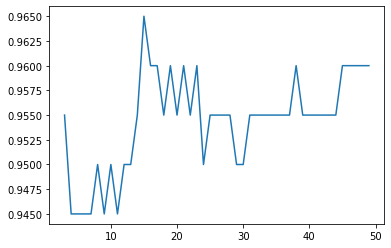

In [57]:
import matplotlib.pyplot as plt
plt.plot(np.array(ks),np.array(scores))

In [59]:
np.array(scores).argmax()

12

In [60]:
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
feature = iris.data
target = iris.target


In [61]:
cross_val_score_k = cross_val_score(knn,x_train,y_train,cv=5)

In [65]:
cross_val_score_k.mean()

0.8175000000000001

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9733333333333333
0.9666666666666667
0.9733333333333333
0.96
0.9733333333333333
0.98
0.9733333333333333
0.9666666666666667
0.9733333333333333
0.9733333333333333
0.9733333333333333
0.9666666666666667
0.9666666666666667


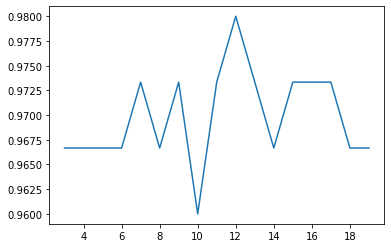

In [68]:
scores = []
kn = []
for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,feature,target,cv=6).mean()
    print(score)
    kn.append(i)
    scores.append(score)
plt.plot(kn,scores)

In [71]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knn,feature,target,cv=10).mean())
lr = LogisticRegression()
print(cross_val_score(lr,feature,target,cv=10).mean())


0.9666666666666668
0.9733333333333334


In [73]:
from numpy import array
from sklearn.model_selection import KFold
data = array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
kfload = KFold(n_splits=3,shuffle=True,random_state=1)
for train,test in kfload.split(data):
    print(train,test)

[0 3 4 5] [1 2 6]
[1 2 3 5 6] [0 4]
[0 1 2 4 6] [3 5]


In [74]:
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X,y = iris.data,iris.target
knn = KNeighborsClassifier(n_neighbors=5)
n_floads = 5
kf = KFold(n_floads,shuffle=True,random_state=42).get_n_splits(X)
scores = cross_val_score(knn,X,y,cv=kf)
scores.mean()

0.9733333333333334

In [75]:
import numpy as np
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
dic = {
    '面积':[55,76,80,100,120,150],
    '售价':[110,152,160,200,240,300]
}
df = DataFrame(data=dic)
df

,面积,售价
0,55,110
1,76,152
2,80,160
3,100,200
4,120,240
5,150,300


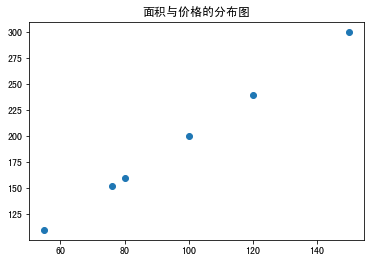

In [79]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.title("面积与价格的分布图")
plt.scatter(df['面积'],df['售价'])


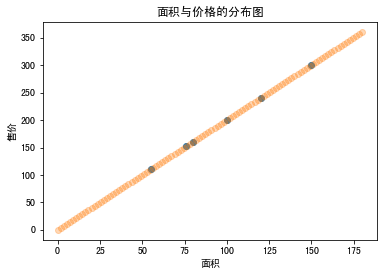

In [80]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.title("面积与价格的分布图")
plt.xlabel('面积')
plt.ylabel('售价')
plt.scatter(df['面积'],df['售价'])
plt.scatter(np.linspace(0,180,num=100),np.linspace(0,180,num=100)*2,alpha=0.3)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [85]:
feature = fch().data
target = fch().target

In [90]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [91]:
lr.coef_

array([ 4.40832770e-01,  9.61642244e-03, -1.14781227e-01,  6.75973842e-01,
       -5.10337874e-06, -3.47558983e-03, -4.19478386e-01, -4.32477249e-01])

In [92]:
lr.intercept_

-36.779443105944495

In [96]:
[*zip(fch().feature_names,lr.coef_)]

[('MedInc', 0.44083277039517),
 ('HouseAge', 0.009616422444042433),
 ('AveRooms', -0.11478122746959646),
 ('AveBedrms', 0.675973842315124),
 ('Population', -5.1033787396040516e-06),
 ('AveOccup', -0.003475589832444126),
 ('Latitude', -0.4194783856769445),
 ('Longitude', -0.4324772490416929)]

In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr.predict(x_test),y_test)

0.531397330705225

In [98]:
y_test.max(),y_test.min()

(5.00001, 0.14999)

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,y_train,cv=5,scoring='neg_mean_squared_error').mean()

-0.5309250456411233